In [16]:
import matplotlib.pyplot as plt

In [29]:
help(LinearStateSpace)

Help on class LinearStateSpace in module quantecon._lss:

class LinearStateSpace(builtins.object)
 |  LinearStateSpace(A, C, G, H=None, mu_0=None, Sigma_0=None)
 |  
 |  A class that describes a Gaussian linear state space model of the
 |  form:
 |  
 |  .. math::
 |  
 |    x_{t+1} = A x_t + C w_{t+1}
 |  
 |    y_t = G x_t + H v_t
 |  
 |  where :math:`{w_t}` and :math:`{v_t}` are independent and standard normal
 |  with dimensions k and l respectively.  The initial conditions are
 |  :math:`\mu_0` and :math:`\Sigma_0` for :math:`x_0 \sim N(\mu_0, \Sigma_0)`.
 |  When :math:`\Sigma_0=0`, the draw of :math:`x_0` is exactly :math:`\mu_0`.
 |  
 |  Parameters
 |  ----------
 |  A : array_like or scalar(float)
 |      Part of the state transition equation.  It should be `n x n`
 |  C : array_like or scalar(float)
 |      Part of the state transition equation.  It should be `n x m`
 |  G : array_like or scalar(float)
 |      Part of the observation equation.  It should be `k x n`
 |  H : 

In [34]:
import numpy as np
from quantecon import LinearStateSpace
from scipy.stats import multivariate_normal

class ProfessionalSchool:
    def __init__(self, A, C, G, mu_0, Sigma_0, beta, T, k, a, b):
        self.A = A
        self.C = C
        self.G = G
        self.mu_0 = mu_0
        self.Sigma_0 = Sigma_0
        self.beta = beta
        self.T = T
        self.k = k
        self.a = a
        self.b = b
        
        # Validate k
        if not (0 <= k <= T-1):
            raise ValueError("k must be in the range [0, T-1]")
        
        #LSS for income process
        self.income_model = LinearStateSpace(A, C, G, mu_0=mu_0, Sigma_0=Sigma_0)
        
    def profession(self):
        # Simulation the income trajectory starting at year k
        x_0 = self.income_model.mu_0
        income_trajectories = [self.income_model.simulate(ts_length=self.T)]
        return income_trajectories[0][:, self.k:self.T]
    
    def unconditional_mean_pv(self):
        mean_pv = 0
        
        for t in range(self.k, self.T):
            y_mean = self.G @ (self.A**(t)) @ self.income_model.mu_0
            discounted_value = self.beta**(t) * y_mean
            mean_pv += discounted_value
        
        return mean_pv
    
    def unconditional_variance_pv(self):
        variance_pv = 0
        
        for t in range(self.k, self.T):
            Sigma_t = self.income_model.C @ (np.linalg.matrix_power(self.A, t)) @ self.income_model.C.T
            variance_pv += self.beta**(2 * (t)) * np.trace(Sigma_t)
        
        return variance_pv
    
    def conditional_mean_pv(self, x_0):
        if np.isscalar(x_0):
            x_0 = np.reshape(x_0, (len(self.A), 1))  # Reshape to column vector with dimension n*1
            
        mean_pv = 0
        
        for t in range(self.k, self.T):
            y_mean = self.income_model.G @ self.A**(t) @ x_0
            discounted_value = self.beta**(t) * y_mean
            mean_pv += discounted_value
        
        return mean_pv
    
    def conditional_variance_pv(self, x_0):
        if np.isscalar(x_0):
            x_0 = np.reshape(x_0, (len(self.A), 1))  # Reshape to column vector with dimension n*1
            
        variance_pv = 0
        
        for t in range(self.k, self.T):
            Sigma_t = self.income_model.C @ (np.linalg.matrix_power(self.A, t)) @ self.income_model.C.T
            variance_pv += self.beta**(2 * (t)) * np.trace(Sigma_t)
        
        return variance_pv
    
    @staticmethod
    def create_person(a, b):
        return {'a': a, 'b': b}
    
    def expected_utility_unconditional(self, person):
        mean_pv = self.unconditional_mean_pv()
        variance_pv = self.unconditional_variance_pv()
        return float(person['a'] * mean_pv - 0.5 * person['b'] * variance_pv)
    
    def expected_utility_conditional(self, person, x_0):
        if np.isscalar(x_0):
            x_0 = np.reshape(x_0, (len(self.A), 1))  # Reshape to column vector with dimension n*1
            
        mean_pv = self.conditional_mean_pv(x_0)
        variance_pv = self.conditional_variance_pv(x_0)
        return float(person['a'] * mean_pv - 0.5 * person['b'] * variance_pv)



In [35]:
#Examples
import numpy as np
from quantecon import LinearStateSpace

# matrices and parameters for three different professions
# Profession 1
A1 = np.array([[0.8, 0.2],
               [0.1, 0.9]])
C1 = np.eye(2)
G1 = np.array([[1.0, 0.0]])
mu_01 = np.array([1.0, 1.0])
Sigma_01 = np.eye(2)
beta = 0.95
T = 30
k1 = 20  # Years of schooling required for profession 1

# Profession 2
A2 = np.array([[0.9, 0.1],
               [0.2, 0.8]])
C2 = np.eye(2)
G2 = np.array([[1.2, -0.4]])
mu_02 = np.array([0.8, 1.2])
Sigma_02 = np.eye(2)
k2 = 5  # Years of schooling required for profession 2

# Profession 3
A3 = np.array([[0.85, 0.15],
               [0.05, 0.95]])
C3 = np.eye(2)
G3 = np.array([[1.5, 0.5]])
mu_03 = np.array([1.2, 0.8])
Sigma_03 = np.eye(2)
k3 = 3  # Years of schooling required for profession 3

#parameters for two different persons
person1 = {'a': 1.0, 'b': 1.0}  # Person 1
person2 = {'a': 1.5, 'b': 0.8}  # Person 2


In [36]:
from scipy.stats import multivariate_normal

# Instantiate three different professions
prof1 = ProfessionalSchool(A1, C1, G1, mu_01, Sigma_01, beta, T, k1, person1['a'], person1['b'])
prof2 = ProfessionalSchool(A2, C2, G2, mu_02, Sigma_02, beta, T, k2, person1['a'], person1['b'])
prof3 = ProfessionalSchool(A3, C3, G3, mu_03, Sigma_03, beta, T, k3, person1['a'], person1['b'])

# Compute expected utility for Person 1 with each profession
expected_utility1_prof1 = prof1.expected_utility_unconditional(person1)
expected_utility1_prof2 = prof2.expected_utility_unconditional(person1)
expected_utility1_prof3 = prof3.expected_utility_unconditional(person1)

# Compute expected utility for Person 2 with each profession
expected_utility2_prof1 = prof1.expected_utility_unconditional(person2)
expected_utility2_prof2 = prof2.expected_utility_unconditional(person2)
expected_utility2_prof3 = prof3.expected_utility_unconditional(person2)

# Display the results
print("Expected utility for Person 1:")
print(f"Profession 1: {expected_utility1_prof1:.2f}")
print(f"Profession 2: {expected_utility1_prof2:.2f}")
print(f"Profession 3: {expected_utility1_prof3:.2f}")
print()
print("Expected utility for Person 2:")
print(f"Profession 1: {expected_utility2_prof1:.2f}")
print(f"Profession 2: {expected_utility2_prof2:.2f}")
print(f"Profession 3: {expected_utility2_prof3:.2f}")


Expected utility for Person 1:
Profession 1: -0.41
Profession 2: -0.51
Profession 3: 3.53

Expected utility for Person 2:
Profession 1: -0.31
Profession 2: 1.31
Profession 3: 8.24


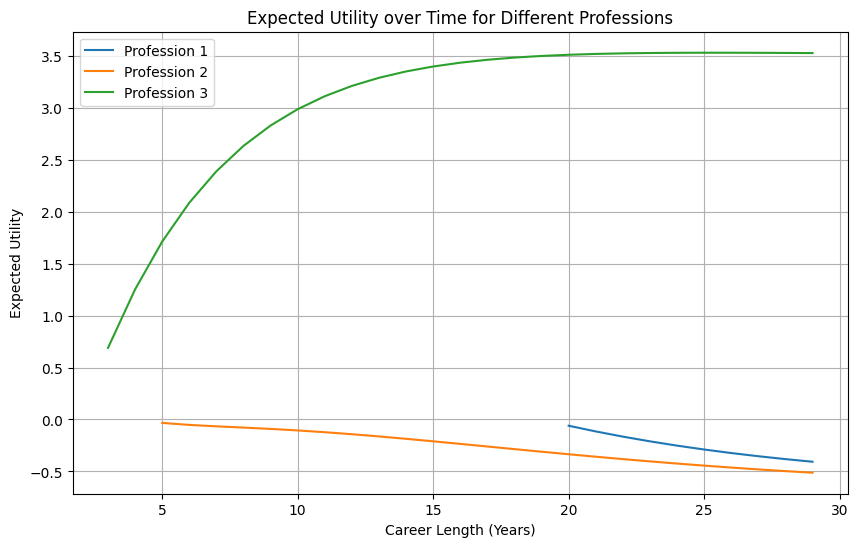

In [37]:
person1 = {'a': 1.0, 'b': 1.0}  # Person's risk preferences

# Initialize lists to store expected utilities over time for each profession
expected_utilities_prof1 = []
expected_utilities_prof2 = []
expected_utilities_prof3 = []

# Compute expected utilities over time for each profession
for t in range(k1, T):
    # Update profession income model with new career length
    prof1.T = t+1
    
    # Calculate expected utility for each profession
    expected_utilities_prof1.append(prof1.expected_utility_unconditional(person1))
for t in range(k2,T):
    prof2.T=t+1
    expected_utilities_prof2.append(prof2.expected_utility_unconditional(person1))
for t in range(k3,T):
    prof3.T=t+1
    expected_utilities_prof3.append(prof3.expected_utility_unconditional(person1))

# Plotting expected utility over time for all professions
plt.figure(figsize=(10, 6))
plt.plot(range(k1, T), expected_utilities_prof1, label='Profession 1')
plt.plot(range(k2, T), expected_utilities_prof2, label='Profession 2')
plt.plot(range(k3, T), expected_utilities_prof3, label='Profession 3')

# Add labels and title
plt.xlabel('Career Length (Years)')
plt.ylabel('Expected Utility')
plt.title('Expected Utility over Time for Different Professions')
plt.legend()
plt.grid(True)
plt.show()

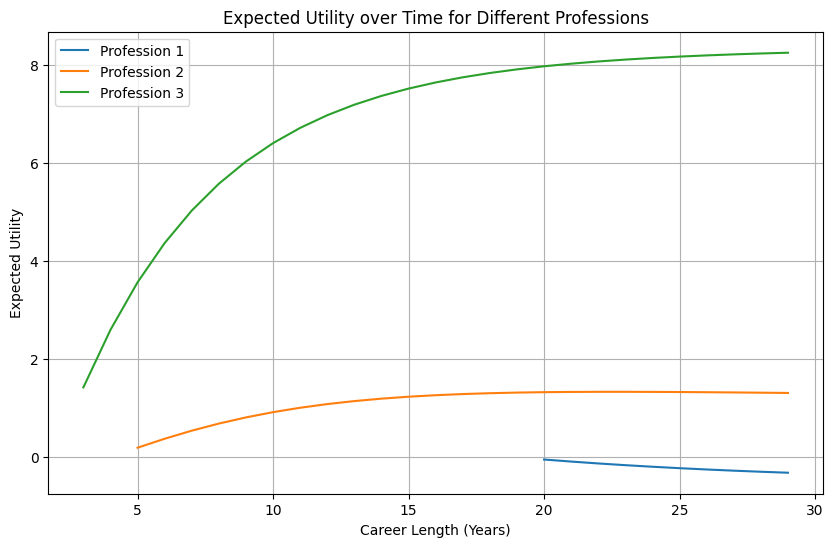

In [38]:
person2 = {'a': 1.5, 'b': 0.8}
# Initialize lists to store expected utilities over time for each profession
expected_utilities_prof1 = []
expected_utilities_prof2 = []
expected_utilities_prof3 = []

# Compute expected utilities over time for each profession
for t in range(k1, T):
    # Update profession income model with new career length
    prof1.T = t+1
    
    # Calculate expected utility for each profession
    expected_utilities_prof1.append(prof1.expected_utility_unconditional(person2))
for t in range(k2,T):
    prof2.T=t+1
    expected_utilities_prof2.append(prof2.expected_utility_unconditional(person2))
for t in range(k3,T):
    prof3.T=t+1
    expected_utilities_prof3.append(prof3.expected_utility_unconditional(person2))

# Plotting expected utility over time for all professions
plt.figure(figsize=(10, 6))
plt.plot(range(k1, T), expected_utilities_prof1, label='Profession 1')
plt.plot(range(k2, T), expected_utilities_prof2, label='Profession 2')
plt.plot(range(k3, T), expected_utilities_prof3, label='Profession 3')

# Add labels and title
plt.xlabel('Career Length (Years)')
plt.ylabel('Expected Utility')
plt.title('Expected Utility over Time for Different Professions')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
#Unconditional Mean for professions
unconditional_mean_pv_prof1 = prof1.unconditional_mean_pv()
unconditional_mean_pv_prof2=prof2.unconditional_mean_pv()
unconditional_mean_pv_prof3=prof3.unconditional_mean_pv()
print("Unconditional mean for Profession 1 :",float(unconditional_mean_pv_prof1))
print("Unconditional mean for Profession 2 :",float(unconditional_mean_pv_prof2))
print("Unconditional mean for Profession 3 :",float(unconditional_mean_pv_prof3))

Unconditional mean for Profession 1 : 0.016113964044040537
Unconditional mean for Profession 2 : 2.458159284996184
Unconditional mean for Profession 3 : 7.739007294448441


In [40]:
#Unconditional Variance for professions
unconditional_var_pv_prof1=prof1.unconditional_variance_pv()
unconditional_var_pv_prof2=prof2.unconditional_variance_pv()
unconditional_var_pv_prof3=prof3.unconditional_variance_pv()

print("Unconditional Variance for Profession 1 :", float(unconditional_var_pv_prof1))
print("Unconditional Variance for Profession 2 :", float(unconditional_var_pv_prof2))
print("Unconditional Variance for Profession 3 :", float(unconditional_var_pv_prof3))

Unconditional Variance for Profession 1 : 0.8458382816895539
Unconditional Variance for Profession 2 : 5.941642783075667
Unconditional Variance for Profession 3 : 8.420526399912273
